# Individual Project 2: Solving the time varying Heat-Equation

In this project, you will derive, implement, and demonstrate the error properties of a finite difference method for solving the heat equation. The objective is to deepen the understanding of initial boundary value problems (IBVPs) by exploring their mathematical formulation, numerical solution, and the physical interpretation of the results. Consider the equation:

$$
\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} + g(x,t), \quad 0 \le t \le T, \; a \le x \le b
 \tag{1}
$$

As always, you are welcome to use ChatGPT to help you arrive at your answers. You are responsible for ensuring that the ultimate writeup is correct, tested for accuracy, and utilizes techniques framed within the course content.

# ChatGPT Transcript: [https://chatgpt.com/share/6812be9f-57f8-8011-8b73-0c690f03beac](https://chatgpt.com/share/6812be9f-57f8-8011-8b73-0c690f03beac)

# Section 1: Formulate the governing equation (15 points)

Provide an appropriate set of boundary and initial conditions for this problem, a choice of values for $a$, $b$, $\kappa$, and $g(x,t)$. Motivate your choices so that the problem has a known analytical solution, and so that it is connected to a physical system you can point to.


---
### Governing Equation and Problem Setup

We consider the one-dimensional **heat equation with a source term**:

$$
\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} + g(x,t), \quad 0 \le t \le T, \; a \le x \le b \tag{1}
$$

This equation models the temperature distribution $ u(x,t) $ in a rod of length $ L = b - a $, subject to thermal diffusion and an internal heat generation term $ g(x,t) $. The parameter $ \kappa > 0 $ represents the **thermal diffusivity** of the material.

### Physical Context

This PDE describes the **temperature evolution in a homogeneous rod** with heat generation (e.g., a resistive heater embedded in the rod). Such models appear in thermal management of electronic components, nuclear fuel rods, or any system where both conduction and internal heat generation are present.

### Choice of Parameters and Domain

To obtain a known analytical solution, we define the following:
- Spatial domain: $ a = 0 $, $ b = 1 $
- Time domain: $ 0 \le t \le T $, with $ T = 0.5 $
- Thermal diffusivity: $ \kappa = 1 $

We choose the exact solution:
$$
u(x,t) = e^{-t} \sin(\pi x)
$$
This form satisfies homogeneous Dirichlet boundary conditions and has smooth time decay, typical of diffusive systems.

### Derivation of Source Term $ g(x,t) $

We substitute the exact solution into Equation (1):

$$
\frac{\partial u}{\partial t} = -e^{-t} \sin(\pi x), \quad
\frac{\partial^2 u}{\partial x^2} = -\pi^2 e^{-t} \sin(\pi x)
$$

Plug into (1):

$$
-e^{-t} \sin(\pi x) = \kappa (-\pi^2 e^{-t} \sin(\pi x)) + g(x,t)
\Rightarrow g(x,t) = (\pi^2 - 1)e^{-t} \sin(\pi x)
$$

Thus, the **source term** is:

$$
g(x,t) = (\pi^2 - 1) e^{-t} \sin(\pi x)
$$

### Initial and Boundary Conditions

Given the exact solution, we define:
- **Initial condition** (at $ t = 0 $):

$$
u(x,0) = \sin(\pi x)
$$

- **Boundary conditions** (for all $ t \in [0,T] $):

$$
u(0,t) = 0, \quad u(1,t) = 0
$$

These are **homogeneous Dirichlet boundary conditions**, modeling a rod held at fixed temperatures (e.g., ends in contact with large heat sinks).

---

# Section 2: Derive the method of lines (IVP) equations (20 points)

Use a finite difference method to "discretize" the spatial derivatives, so that you ultimately arrive at a governing equation of the form $\dot{\mathbf{u}} = \mathbf{f}(\mathbf{u},t)$, where $\mathbf{u}$ approximates the true solution to the IBVP (1), at a collection of discrete points.

Perform this derivation for a second order, central finite difference method. Show the steps in going from the IBVP (1) to the method of lines, space-discretized IVP $\dot{\mathbf{u}} = \mathbf{f}(\mathbf{u},t)$. Make sure this derivation aligns with the approach utilized in class (i.e., if using chatGPT, make sure to guide it through a derivation that is compatible with the class notes!)


---
### Method of Lines Derivation for the Heat Equation

We begin with the IBVP for the heat equation with a source term:

$$
\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} + g(x,t), \quad x \in [a,b], \; t \in [0,T]
$$

with boundary conditions:

$$
u(a,t) = 0, \quad u(b,t) = 0
$$

and initial condition:

$$
u(x,0) = u_0(x)
$$

We now derive a method of lines (MOL) formulation using a second-order central finite difference for the spatial derivatives.


### Step 1: Discretize the Spatial Domain

Divide the interval $ [a, b] $ into $ n+1 $ subintervals, using the following equation:

$$x_j=\dfrac{(b-a)(j-1)}{n}, \quad j=1,\cdots,n+1.$$

We will rearrange the equation so that there is uniform spacing

$$
h = \frac{b - a}{n+1}
$$,

and the spatial grid points are:

$$
x_j = a + jh, \quad j = 0, 1, \dots, n+1
$$

Let $ u_j(t) \approx u(x_j, t) $ be the approximation to the solution at point $ x_j $ and time $ t $. The interior nodes are $ j = 1, 2, \dots, n $, since the boundary values $ u_0(t) $ and $ u_{n+1}(t) $ are known (zero from Dirichlet BCs).

### Step 2: Approximate Spatial Derivatives using Local Lagrange Interpolation

We approximate the solution $ u(x, t) $ near each grid point $ x_j $ using a local polynomial interpolant centered at $ x_j $. Specifically, we write:

$$
u(x,t) \approx \sum_{i = j - p/2}^{j + p/2} b_i(t) L_i^{(j)}(x)
$$

Here:
- $ L_i^{(j)}(x) $ are **Lagrange basis polynomials** centered at $ x_j $, constructed using the $ p+1 $ neighboring grid points $ x_i $ with $ i \in [j - p/2, j + p/2] $
- $ b_i(t) \approx u(x_i, t) $ are the coefficients of the interpolant, which are simply the function values at the interpolation nodes

We are interested in computing $ \partial^2 u / \partial x^2 $ at $ x_j $. Since the basis polynomials are time-independent, we compute the second derivative of the interpolant:

$$
\left. \frac{\partial^2 u}{\partial x^2} \right|_{x = x_j} \approx \sum_{i = j - p/2}^{j + p/2} b_i(t) \left. \frac{d^2}{dx^2} L_i^{(j)}(x) \right|_{x = x_j}
$$

Let:

$$
D^{(2)}_{j,i} = \left. \frac{d^2}{dx^2} L_i^{(j)}(x) \right|_{x = x_j}
$$

Then the second derivative at $ x_j $ becomes:

$$
\left. \frac{\partial^2 u}{\partial x^2} \right|_{x = x_j} \approx \sum_{i = j - p/2}^{j + p/2} D^{(2)}_{j,i} b_i(t)
$$

### Step 3: Form the ODE System

Substituting this approximation into the heat equation gives:

$$
\frac{d b_j(t)}{dt} = \kappa \sum_{i = j - p/2}^{j + p/2} D^{(2)}_{j,i} b_i(t) + g(x_j, t)
$$

for each interior node $ j = 1, \dots, n $. This defines a system of ODEs for the coefficients $ \mathbf{b}(t) = [b_1(t), \dots, b_n(t)]^T $.

This can be written in matrix-vector form as:

$$
\frac{d \mathbf{b}}{dt} = \kappa D^{(2)} \mathbf{b}(t) + \mathbf{g}(t) \tag{3}
$$

where:
- $ D^{(2)} \in \mathbb{R}^{n \times n} $ is the global second derivative matrix constructed from the local stencils $ D^{(2)}_{j,i} $
- $ \mathbf{g}(t) \in \mathbb{R}^n $ has components $ g(x_j, t) $

### Step 4: Initial Condition

We initialize the system by sampling the exact initial condition:

$$
b_j(0) = u_0(x_j), \quad j = 1, \dots, n
$$

so that:

$$
\mathbf{b}(0) = [u_0(x_1), u_0(x_2), \dots, u_0(x_n)]^T
$$

---

# Section 3: Choose a finite difference method in time to solve the discretized IVP (15 points)

Choose and justify your choice of time integrator for the IVP you derive above, in the form $\dot{\mathbf{u}} = \mathbf{f}(\mathbf{u},t)$.

You need not fully derive the time-discrete algebraic equations, but be sure to write out their final form so that it is clear how to advance from the approximate solution at some time $t_k$ to the solution at $t_{k+1}$.

Justify your choice of time integrator. This justification need not be expansive, but should be thoughtful enough to state any relevant properties of the space-discretized IVP and how that informs your choice of time integrator.



---
## Choice of Time Integrator for the IVP

We consider the semi-discrete ODE system obtained from the method of lines:

$$
\frac{d\mathbf{b}}{dt} = \kappa D^{(2)} \mathbf{b}(t) + \mathbf{g}(t), \quad \mathbf{b}(0) = \mathbf{u}_0
$$

This system is linear in $ \mathbf{b}(t) $, but the matrix $ D^{(2)} $ contains large negative eigenvalues proportional to $ -1/h^2 $, making the system **stiff**, especially for fine spatial discretizations.

### Chosen Time Integrator: **Backward Euler Method (First-Order Implicit)**

To address the stiffness, we choose the **Backward Euler method**, which is **A-stable**, meaning it remains stable regardless of the time step size for linear systems with eigenvalues having negative real parts (as is the case here).

#### Backward Euler Update Formula:

Given the solution $ \mathbf{b}^k \approx \mathbf{b}(t_k) $, the next step is computed as:

$$
\mathbf{b}^{k+1} = \mathbf{b}^k + \Delta t \left[ \kappa D^{(2)} \mathbf{b}^{k+1} + \mathbf{g}(t_{k+1}) \right]
$$

Rearranging:

$$
\left( I - \Delta t \kappa D^{(2)} \right) \mathbf{b}^{k+1} = \mathbf{b}^k + \Delta t \mathbf{g}(t_{k+1})
$$

This is a **linear system** to be solved at each time step for $ \mathbf{b}^{k+1} $.

### Justification of the Choice

- **Stability for stiff problems**: The semi-discrete system has eigenvalues that grow in magnitude like $ -1/h^2 $. For explicit methods (e.g., Forward Euler), the time step restriction is $ \Delta t = \mathcal{O}(h^2) $ for stability. Backward Euler, being A-stable, allows much larger $ \Delta t $, making it far more efficient for long time simulations.

- **Physical consistency**: Implicit methods like Backward Euler tend to better preserve qualitative behavior of diffusive systems, such as monotonic decay and damping of high-frequency components, which are important for physically accurate results.

---

# Section 4: Numerically compute and plot your answer (25 points)

Implement the method you concocted above in python. Plot the solution at a few representative time instances, along with the true solution, to highlight a correct implementation


---
A rough explanation of the code is as follows:

### 1. Parameter Setup
We define the spatial and temporal domains:
- `a`, `b`: Spatial domain endpoints.
- `T`: Final simulation time.
- `N`: Number of interior spatial points.
- `dt`: Time step size.
- `Nt`: Total number of time steps.
- `x`: Grid points including boundaries.
- `h`: Spatial step size.

### 2. Exact Solution and Source Term
We define a known exact solution:  
$$
u(x,t) = e^{-t} \sin(\pi x)
$$  
which satisfies the heat equation with source term:
$$
g(x,t) = (\pi^2 - 1) e^{-t} \sin(\pi x)
$$

These functions are used to compute initial conditions and compare with the numerical solution for validation.

### 3. Spatial Discretization (Second Derivative Matrix)
We construct the second-order finite difference approximation of the Laplacian operator using sparse matrices for efficiency:
$$
D^{(2)} \approx \frac{1}{h^2} \begin{bmatrix}
-2 & 1 &        &        \\
1  & -2 & 1      &        \\
   & \ddots & \ddots & \ddots \\
   &        & 1 & -2
\end{bmatrix}
$$

### 4. Time Integration using Backward Euler
To solve the resulting stiff ODE system, we use the **Backward Euler** method:
$$
(I - \Delta t \kappa D^{(2)}) \mathbf{u}^{k+1} = \mathbf{u}^k + \Delta t \cdot \mathbf{g}(t_{k+1})
$$
At each time step, a linear system is solved using `spsolve` from SciPy.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# --- Parameters for Exact Solution ---
a, b = 0, 1
T = 0.5
kappa = 1.0
N_exact = 100
dt_exact = 0.01
Nt_exact = int(T / dt_exact)
x_exact = np.linspace(a, b, N_exact + 2)

# --- Parameters for Numerical Solution ---
N_num = 10
dt_num = 0.12
Nt_num = int(T / dt_num)
x_num = np.linspace(a, b, N_num + 2)
h_num = (b - a) / (N_num + 1)

# --- Exact solution function ---
def u_exact(x, t):
    return np.exp(-t) * np.sin(np.pi * x)

def g(x, t):
    return (np.pi**2 - 1) * np.exp(-t) * np.sin(np.pi * x)

# --- Precompute Exact Solution ---
U_exact_all = []
for n in range(Nt_exact + 1):
    t = n * dt_exact
    U_exact_all.append(u_exact(x_exact, t))

# --- Build Matrix for Numerical Solver ---
main_diag = -2 * np.ones(N_num)
off_diag = np.ones(N_num - 1)
D2 = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1]) / h_num**2

I = diags([np.ones(N_num)], [0])
A = I - dt_num * kappa * D2

# --- Initial Condition (Numerical) ---
u = u_exact(x_num[1:-1], 0)
U_num_all = [np.concatenate(([0], u, [0]))]

# --- Time Stepping (Numerical) ---
for n in range(1, Nt_num + 1):
    t = n * dt_num
    rhs = u + dt_num * g(x_num[1:-1], t)
    u = spsolve(A, rhs)
    U_num_all.append(np.concatenate(([0], u, [0])))


---
### Storing and Plotting Results
- The full solution (including boundary values) is stored at each time step.
- Six representative time instances are selected, and the numerical solution is plotted alongside the exact solution in **six separate subplots** within one figure.
- This visual comparison helps verify the accuracy of the numerical method.

---

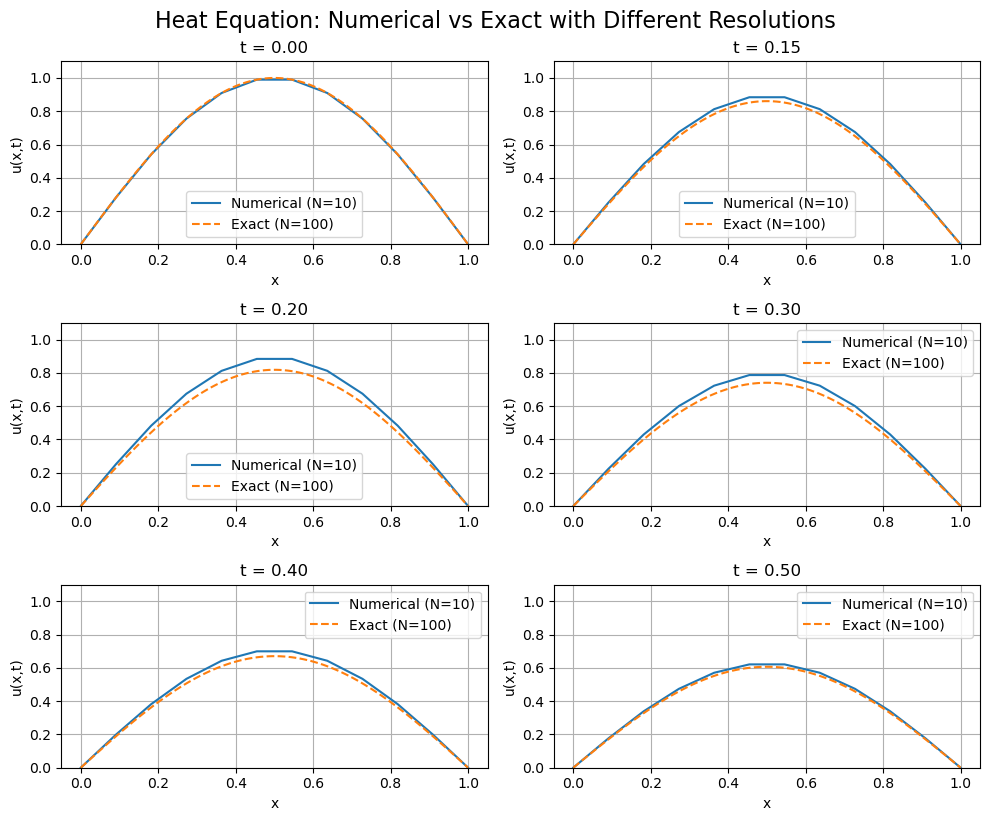

In [2]:
# --- Plotting ---
times_to_plot = [0.0, 0.15, 0.2, 0.3, 0.4, 0.5]
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.flatten()

# Determine y-limits from t = 0 and add 10% buffer
idx0_exact = int(times_to_plot[0] / dt_exact)
idx0_num = int(times_to_plot[0] / dt_num)
y_combined = np.concatenate([U_num_all[idx0_num], U_exact_all[idx0_exact]])
ymin, ymax = y_combined.min(), y_combined.max()
y_buffer = 0.1 * (ymax - ymin)
ymax += y_buffer

for i, t_plot in enumerate(times_to_plot):
    idx_num = int(t_plot / dt_num)
    idx_exact = int(t_plot / dt_exact)
    u_num = U_num_all[idx_num]
    u_exact_vals = U_exact_all[idx_exact]

    axs[i].plot(x_num, u_num, label=("Numerical (N=10)"), color='tab:blue')
    axs[i].plot(x_exact, u_exact_vals, '--', label="Exact (N=100)", color='tab:orange')
    axs[i].set_title(f"t = {t_plot:.2f}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("u(x,t)")
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_ylim(ymin, ymax)

plt.tight_layout()
plt.suptitle("Heat Equation: Numerical vs Exact with Different Resolutions", fontsize=16, y=1.02)
plt.show()

# Section 5: Quantify your error (25 points)

Perform convergence tests to demonstrates that your method converges at the right rate in **both space and time**. That is, for a small value of $\Delta t$, demonstrate that the numerical solution exhibits the expected convergence rate in $\Delta x$ (make sure to use the appropriate grid-2 norm). Then, for a small value of $\Delta x$, demonstrate that the numerical solution exhibits the expected convergence rate in $\Delta t$.


---
A rough explanation of the code is as follows:

### Solve for the Heat

1. **Sets up the spatial grid** and the second derivative matrix $ D^2 $ using central finite differences.
2. **Constructs the matrix `A`** for the Backward Euler time-stepping method.
3. **Iterates through time steps** using the Backward Euler method to compute the solution at each time step.
4. **Calculates the error** in the grid-2 norm by comparing the final numerical solution to the exact solution at the final time `T`.

### Spatial Convergence Test

- For fixed small `dt`, we can solve for different values of `N` (number of spatial grid points).
- The spatial error is calculated for each grid size, and the error is expected to decay as $ \mathcal{O}(h^2) $, where `h` is the spatial grid spacing.

### Temporal Convergence Test

- For fixed `N` (spatial grid points), we can solve for decreasing values of `dt` (time step size).
- The temporal error is calculated for each time step size, and the error is expected to decay as $ \mathcal{O}(\Delta t) $.

---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Problem setup
kappa = 1.0
a, b, T = 0, 1, 0.1

def solve_heat(N, dt, T):
    h = (b - a) / (N + 1)
    x = np.linspace(a, b, N+2)
    Nt = int(T / dt)

    # Setup second derivative matrix
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    D2 = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1]) / h**2
    A = diags([np.ones(N)], [0]) - dt * kappa * D2

    u = u_exact(x[1:-1], 0)
    for n in range(Nt):
        t = (n+1) * dt
        rhs = u + dt * g(x[1:-1], t)
        u = spsolve(A, rhs)

    # Compute grid-2 error norm
    u_full = np.concatenate(([0], u, [0]))
    u_exact_T = u_exact(x, T)
    err = np.sqrt(h * np.sum((u_full - u_exact_T)**2))
    return err

# --- Spatial convergence test ---
dt_small = 1e-4  # small enough to neglect time error
Ns = [10 * 2**i for i in range(10)]
hs = [(b - a) / (N + 1) for N in Ns]
errors_space = [solve_heat(N, dt_small, T) for N in Ns]

# --- Temporal convergence test ---
N_fixed = 100     # fine enough spatially
dts = [1e-1 / 2**i for i in range(10)]
errors_time = [solve_heat(N_fixed, dt, T) for dt in dts]


---
### Plots

1. **Spatial Convergence Plot**: Shows the decay in error as a function of $ \Delta x $ (grid spacing) on a log-log scale, with the expected second-order convergence. We can also observe where the error stops decreasing due to being limited by $\Delta t$.
2. **Temporal Convergence Plot**: Shows the decay in error as a function of $ \Delta t $ (time step size) on a log-log scale, with the expected first-order convergence. We can also observe where the error stops decreasing due to being limited by $\Delta x$.

---

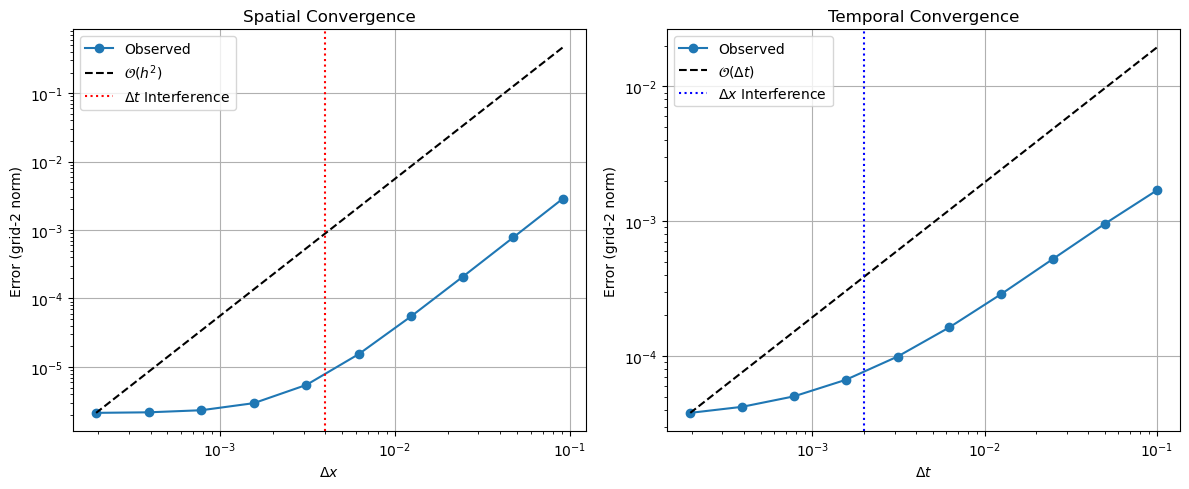

In [4]:

# Generate reference lines
ref_space = [errors_space[-1] * (h / hs[-1])**2 for h in hs]
ref_time = [errors_time[-1] * (dt / dts[-1]) for dt in dts]


# --- Plot spatial convergence ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(hs, errors_space, 'o-', label='Observed')
plt.loglog(hs, ref_space, 'k--', label=r'$\mathcal{O}(h^2)$')
plt.axvline(0.004, color='red', linestyle=':', label=r'$\Delta t$ Interference')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Error (grid-2 norm)')
plt.title('Spatial Convergence')
plt.grid(True)
plt.legend()

# --- Plot temporal convergence ---
plt.subplot(1, 2, 2)
plt.loglog(dts, errors_time, 'o-', label='Observed')
plt.loglog(dts, ref_time, 'k--', label=r'$\mathcal{O}(\Delta t)$')
plt.axvline(0.002, color='blue', linestyle=':', label=r'$\Delta x$ Interference')
plt.xlabel(r'$\Delta t$')
plt.ylabel('Error (grid-2 norm)')
plt.title('Temporal Convergence')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
